In [46]:
import pandas as pd
import numpy as np
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,LSTM,Flatten,Dense
from keras.initializers import Constant
import matplotlib.pyplot as plt
import os
import random
import cv2

In [2]:
with open('data2.json') as f:
    data=json.load(f)

In [3]:
X,y=[],[]
for i in data['intents']:
    for j in i['patterns']:
        X.append(j)
        y.append(i['tag'])

In [4]:
X[:20]

['Can you show me a picture of nature?',
 'Show me a picture of nature',
 'Can you please show me a picture of nature?',
 'please Show me a picture of nature',
 'Give me a picture of nature',
 'please Give me a picture of nature',
 'nature',
 'nature photo',
 'nature photos',
 'nature image',
 'nature images',
 'nature picture',
 'nature pictures',
 'Can you show me a picture of car?',
 'Show me a picture of car',
 'Can you please show me a picture of car?',
 'please Show me a picture of car',
 'Give me a picture of car',
 'please Give me a picture of car',
 'car']

In [5]:
y[:20]

['nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'nature',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car',
 'car']

In [6]:
len(X)

130

In [7]:
len(y)

130

In [8]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [9]:
tokenizer.word_index

{'picture': 1,
 'me': 2,
 'a': 3,
 'of': 4,
 'show': 5,
 'please': 6,
 'can': 7,
 'you': 8,
 'give': 9,
 'sea': 10,
 'nature': 11,
 'car': 12,
 'motorcycle': 13,
 'fruit': 14,
 'airplane': 15,
 'tv': 16,
 'laptop': 17,
 'cellphone': 18,
 'images': 19,
 'headphone': 20,
 'photos': 21,
 'image': 22,
 'pictures': 23,
 'photo': 24}

In [10]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

25

In [11]:
X_seq=tokenizer.texts_to_sequences(X)
X_seq[:10]

[[7, 8, 5, 2, 3, 1, 4, 11],
 [5, 2, 3, 1, 4, 11],
 [7, 8, 6, 5, 2, 3, 1, 4, 11],
 [6, 5, 2, 3, 1, 4, 11],
 [9, 2, 3, 1, 4, 11],
 [6, 9, 2, 3, 1, 4, 11],
 [11],
 [11, 24],
 [11, 21],
 [11, 22]]

In [12]:
maxlen=max([len(i) for i in X_seq])
maxlen

9

In [13]:
X_pad=pad_sequences(X_seq,maxlen=maxlen,padding='post')
X_pad

array([[ 7,  8,  5, ...,  4, 11,  0],
       [ 5,  2,  3, ...,  0,  0,  0],
       [ 7,  8,  6, ...,  1,  4, 11],
       ...,
       [18, 19,  0, ...,  0,  0,  0],
       [18,  1,  0, ...,  0,  0,  0],
       [18, 23,  0, ...,  0,  0,  0]])

In [14]:
X_pad[0]

array([ 7,  8,  5,  2,  3,  1,  4, 11,  0])

In [15]:
le=LabelEncoder()
y_le=le.fit_transform(y)

In [16]:
y_le

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [17]:
glove_file=open('glove.6B.100d.txt',encoding='utf8')
embedding_vectors=dict()
for i in glove_file:
    record=i.split()
    word=record[0]
    vector=np.asarray(record[1:],dtype='float32')
    embedding_vectors[word]=vector

In [18]:
embedding_vectors['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [19]:
embedding_matrix=np.zeros((vocab_size,100))
for word,index in tokenizer.word_index.items():
    emb=embedding_vectors.get(word)
    if emb is not None:
        embedding_matrix[index]=emb

In [20]:
embedding_matrix[1]

array([ 0.13544001,  0.51792997,  0.52565002, -0.29115999,  0.67457998,
       -0.34257999, -0.35676   , -0.30554   ,  0.089844  , -0.13929   ,
        0.33364001, -0.15591   ,  0.32541999, -0.17579   ,  0.48791   ,
        1.09710002,  0.48881   , -0.25977001,  1.05850005,  0.016773  ,
       -0.38321   , -0.26677001,  0.092782  , -0.36359999,  0.51657999,
       -0.22081   ,  0.025843  ,  0.0090986 , -0.41758001, -0.36989999,
        0.77912998, -0.1539    , -0.1108    ,  0.089329  ,  0.14005999,
       -0.096537  , -0.19384   ,  0.3897    , -0.13186   , -0.42588001,
       -0.12616   , -0.22543   , -0.49364001,  0.12035   , -0.24616   ,
       -0.25312999, -0.11778   ,  0.049156  , -0.24684   , -0.61123002,
        0.40426001, -0.23232   ,  0.31257001,  1.50390005,  0.37128001,
       -2.46230006,  0.24374001,  0.48763999,  1.0546    , -0.40178999,
       -0.20344999,  1.69910002, -0.90947002, -0.31826001,  0.55765003,
        0.34649   ,  0.50935   ,  0.60086   , -0.61957002,  0.39

In [21]:
i=Input(shape=(maxlen,))
x=Embedding(vocab_size,100,embeddings_initializer=Constant(embedding_matrix))(i)
x=LSTM(15,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(10,activation='softmax')(x)
model=Model(inputs=i,outputs=x)

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history=model.fit(X_pad,y_le,epochs=70)

Epoch 1/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1006 - loss: 2.3091 
Epoch 2/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1447 - loss: 2.2705  
Epoch 3/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1817 - loss: 2.2456 
Epoch 4/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2579 - loss: 2.2135 
Epoch 5/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2667 - loss: 2.1886 
Epoch 6/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3337 - loss: 2.1929 
Epoch 7/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3851 - loss: 2.1536 
Epoch 8/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4257 - loss: 2.1240  
Epoch 9/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4749 - loss: 2.0888 
Epoch 10/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5591 - loss: 2.0481 
Epoch 11/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6421 - loss: 2.0197 
Epoch 12/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6813 - loss: 1.9416

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.2191 


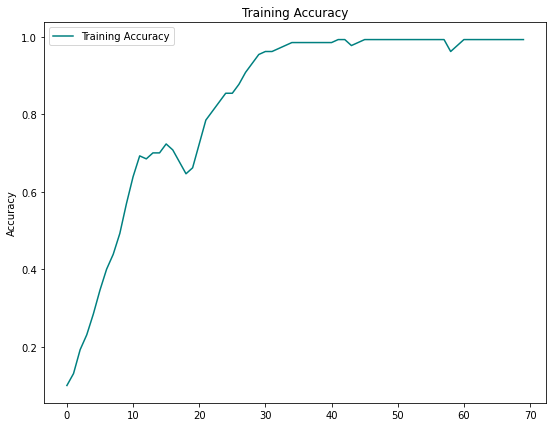

In [25]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

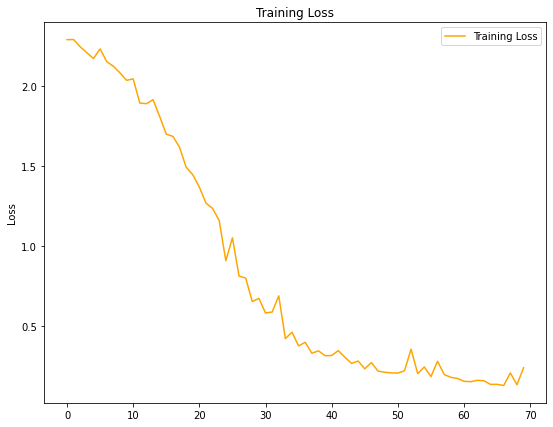

In [26]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
def input_text(text):
    path='im/'
    text=tokenizer.texts_to_sequences([text])[0]
    text=np.array(pad_sequences([text],maxlen=maxlen,padding='post'))
    pred=np.argmax(model.predict(text))
    predict=le.inverse_transform([pred])[0]
    full_path=path+predict
    choose=random.choice(os.listdir(full_path))
    image_path=full_path+'/'+choose
    img=cv2.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


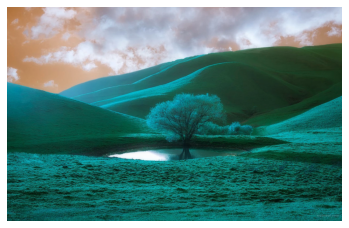

In [57]:
input_text('i want to see nature')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


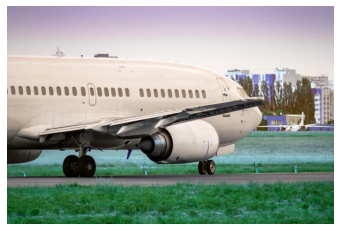

In [58]:
input_text('i need an image of airplane')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


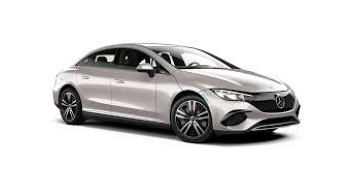

In [70]:
input_text('i am researching car. can you give me a picture of it?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


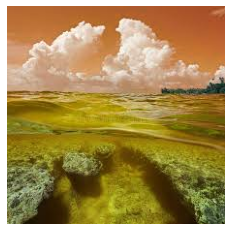

In [72]:
input_text('I need a picture of sea for presentation')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


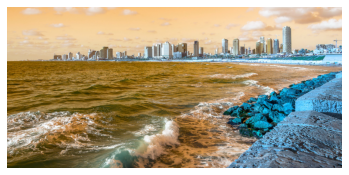

In [77]:
input_text('please give me another picture of sea')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


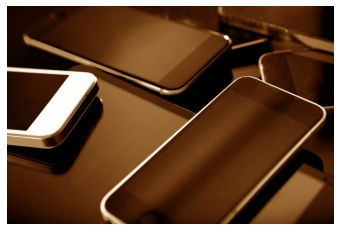

In [78]:
input_text('what does a cellphone look like? show me a picture of it')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


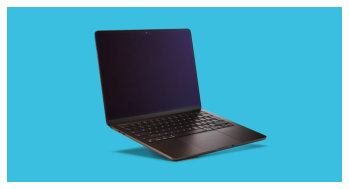

In [79]:
input_text('how about laptop?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


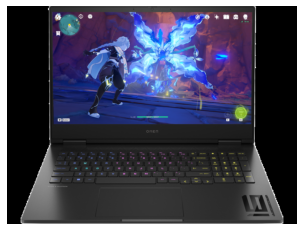

In [80]:
input_text('please give me another image of laptop')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


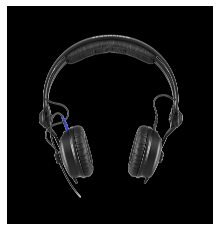

In [81]:
input_text('I want to buy a headphone. can you show me a picture of it?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


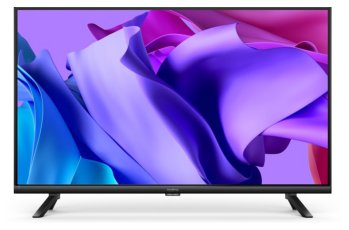

In [82]:
input_text('I want to see a tv image')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


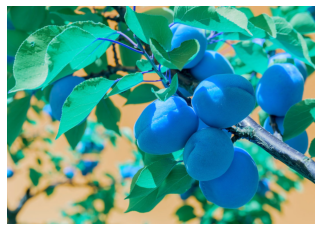

In [83]:
input_text('also fruit')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


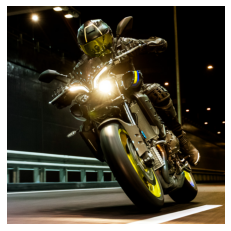

In [84]:
input_text('Finally, if you show a photo of a motorcycle, it will be great')